In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
df=pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [4]:
column_names=df.columns

In [7]:
column_names

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
for column in column_names:
    new_name=column.replace(' ','_')
    df.rename(columns={column:new_name},inplace=True)

In [9]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [10]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

no missing values

# To find the number of male and female participated in test

In [11]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# Student parental education

In [23]:
df['parental_level_of_education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [12]:
df['Total_mark']=df['math_score']+df['reading_score']+df['writing_score']

In [13]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_mark
0,female,group C,some high school,free/reduced,none,0,17,10,27
1,female,group B,high school,free/reduced,none,8,24,23,55
2,female,group B,some high school,free/reduced,none,18,32,28,78
3,female,group B,some college,standard,none,11,38,32,81
4,female,group C,some college,free/reduced,none,22,39,33,94


In [14]:
parent_education=df['parental_level_of_education']
total_mark=df['Total_mark']

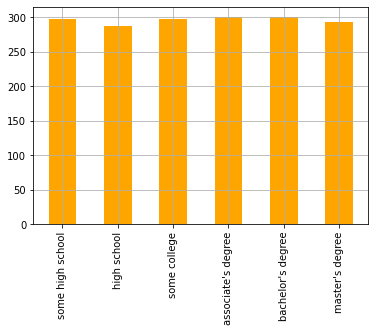

In [15]:
plt.bar(parent_education,total_mark, color='orange',width=0.5)
plt.xticks(rotation=90)
plt.grid()
plt.show()

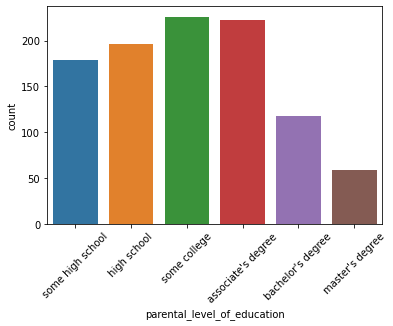

In [47]:
sns.countplot(df['parental_level_of_education'])
plt.xticks(rotation=45)
plt.show()

From the details, we can see that highest number of parents level of education is 'some college'
From above graph, we can see that highest total mark of students are scored who's parent level of education is associate's degree and bachelor's degree.
Parents who completed master's degree is less and most of them attended some college


# Who scores the most on average for math, reading and writing based on gender

In [48]:
df.groupby(['gender'])['math_score','reading_score','writing_score'].mean()

,math_score,reading_score,writing_score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [43]:
df.groupby('gender')['Total_mark'].mean()

gender
female    208.434363
male      197.813278
Name: Total_mark, dtype: float64

males has highest average on math_score.
Female has highest average on reading score and writing score but the female has highest average for total marks


# Who scores the most on average for math, reading and writing based on Test preparation course

In [49]:
df.groupby(['test_preparation_course'])['math_score','reading_score','writing_score'].mean()

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


In [44]:
df.groupby('test_preparation_course')['Total_mark'].mean()

test_preparation_course
completed    218.826816
none         194.665109
Name: Total_mark, dtype: float64

Those who have completed the test preparation course has highest average for math, reading, writing when compared to those who didn't taken test preparation course. 

Those who has taken test preparation course has highest total mark

# What do you think about the scoring variation for math, reading and writing based on Gender

In [70]:
df.groupby('gender')['math_score','reading_score','writing_score'].std()

,math_score,reading_score,writing_score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


In [51]:
df.groupby('gender')['math_score','reading_score','writing_score'].agg([min,max])

math_score      reading_score      writing_score     
              min  max           min  max           min  max
gender                                                      
female          0  100            17  100            10  100
male           27  100            23  100            15  100

We can also see the standard deviation of each test too and male has lowest standard deviation for reading_score

In below table we can see the lowest mark scores and the highest mark scored for each test.

# What do you think about the scoring variation for math, reading and writing based on Test preparation course

In [66]:
df.groupby('test_preparation_course')['math_score','reading_score','writing_score'].std()

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


In [56]:
df.groupby('test_preparation_course')['math_score','reading_score','writing_score'].agg([min,max])

math_score      reading_score      writing_score     
                               min  max           min  max           min  max
test_preparation_course                                                      
completed                       23  100            37  100            36  100
none                             0  100            17  100            10  100

In above table we can see the standard deviation for each test and for those who has completed test preparation course has lowest stadard deviation for  writing_score.


# The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [72]:
df.describe()

,math_score,reading_score,writing_score,Total_mark
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000,203.315000
std,15.569567,14.706436,15.226381,43.227009
min,0.000000,17.000000,10.000000,27.000000
25%,57.000000,59.000000,58.000000,175.000000
50%,66.000000,70.000000,69.000000,206.000000
75%,77.000000,79.250000,79.000000,233.250000
max,100.000000,100.000000,100.000000,300.000000


In [78]:
top_25=df.sort_values('math_score', ascending=False)

In [80]:
top_25.quantile(0.75, axis=0)

math_score        77.00
reading_score     79.25
writing_score     79.00
Total_mark       233.25
Name: 0.75, dtype: float64

In [88]:
Top_25=df[df['math_score']>77]

In [89]:
Top_25

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_mark
430,female,group A,some college,standard,completed,78,87,91,256
431,female,group B,bachelor's degree,free/reduced,none,78,79,76,233
432,female,group D,bachelor's degree,standard,none,78,82,79,239
433,female,group D,high school,standard,none,78,81,80,239
434,female,group D,bachelor's degree,free/reduced,none,78,90,93,261
...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,267
996,male,group A,some college,standard,completed,100,96,86,282
997,male,group D,some college,standard,completed,100,97,99,296
998,male,group E,associate's degree,free/reduced,completed,100,100,93,293


We can see top 25% according to math_score